<a href="https://colab.research.google.com/github/cmosquera15/Entregas-Fundamentos-de-Ciencia-de-Datos-2026.1/blob/main/sesiones_practicas/sp1_camilo_mosquera_jose_correa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploración inicial del conjunto de datos: **Movies Dataset**
**Proyecto:** Cinematik\
**Autores:** Camilo Mosquera y José Miguel Correa  
**Fecha:** 24 de febrero de 2026

**Contenido**
1. Introducción  
2. Preparación de la fuente de datos y librerías  
3. Descripción de la base de datos  
4. Visualizaciones exploratorias básicas  
5. Interpretaciones iniciales  
6. Conclusiones  
7. Fuente de los datos


# 1. Introducción


### 1.1 Pregunta de investigación
¿Qué características de las películas influyen potencialmente en la decisión de los usuarios al momento de elegir qué película mirar en la aplicación Cinematik?

### 1.2 Contexto
La aplicación Cinematik planea evolucionar desde una plataforma de búsqueda y calificación de películas hacia un sistema que incluya recomendaciones personalizadas. Con el objetivo de mantener la cercanía y permanencia de los usuarios, se busca implementar un CRM que incorpore un sistema de recomendación y el envío de sugerencias mediante correo electrónico. Para desarrollar este sistema, primero es necesario comprender qué características de las películas podrían influir en la decisión de los usuarios.

### 1.3 Relación entre el problema y la base de datos seleccionada
Para abordar esta pregunta, se seleccionó el conjunto de datos [Movies Dataset](https://www.kaggle.com/datasets/saketsingh9728/movies-dataset), extraído de [TMDB](https://www.themoviedb.org/?language=es) y disponible en Kaggle. Este dataset contiene aproximadamente 10.000 películas (actualizado al 6 de febrero de 2026) e incluye información como: **géneros**, **lenguaje original**, **títulos**, **sinopsis**, **fecha de lanzamiento** y **popularidad**. Estas variables permiten explorar qué atributos podrían ser relevantes al momento de elegir una película.


# 2. Preparación de la fuente de datos y librerías

In [1]:
# Librerías
import os, glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Instala kagglehub (existe la posibilidad de que no se necesite, sin embargo lo dejamos para evitar errores)

!pip -q install kagglehub[pandas-datasets]

import kagglehub

# 2) Descarga el dataset (Kaggle handle)
dataset_handle = "saketsingh9728/movies-dataset"
dataset_path = kagglehub.dataset_download(dataset_handle)

print("Dataset descargado desde:", dataset_path)

# 3) Buscamos el archivo CSV dentro del dataset
csv_files = sorted(glob.glob(os.path.join(dataset_path, "**", "*.csv"), recursive=True))
print("CSV encontrado:", os.path.basename(csv_files[0]))

# 4) Cargamos el CSV (es el primero porque es el unico que tenemos)
target = csv_files[0]
df = pd.read_csv(target)

print("Archivo cargado:", os.path.basename(target))

100%|██████████| 1.81M/1.81M [00:00<00:00, 108MB/s]

Extracting files...
Dataset descargado desde: /root/.cache/kagglehub/datasets/saketsingh9728/movies-dataset/versions/1
CSV encontrado: movies_dataset.csv
Archivo cargado: movies_dataset.csv


# 3. Descripción de la base de datos

Cada registro representa una película. A continuación se revisan: una muestra del dataset, dimensiones, valores nulos, columnas constantes y tipos de datos para entender la estructura general antes de cualquier proceso de limpieza o modelado.


In [2]:
# Visualizamos una muestra de datos
df.head()

,adult,backdrop_path,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,title,video,vote_average,vote_count
0,False,/e4OnHU8HNAhdS6C4Ypk6NA26kPQ.jpg,"[28, 35, 80]",1168190,en,The Wrecking Crew,Estranged half-brothers Jonny and James reunit...,673.3304,/gbVwHl4YPSq6BcC92TQpe7qUTh6.jpg,2026-01-28,The Wrecking Crew,False,6.741,346
1,False,/tyjXlexbNZQ0ZT1KEJslQtBirqc.jpg,"[12, 53, 878]",840464,en,Greenland 2: Migration,Having found the safety of the Greenland bunke...,624.2323,/1mF4othta76CEXcL1YFInYudQ7K.jpg,2026-01-07,Greenland 2: Migration,False,6.472,301
2,False,/5h2EsPKNDdB3MAtOk9MB9Ycg9Rz.jpg,"[16, 35, 12, 10751, 9648]",1084242,en,Zootopia 2,After cracking the biggest case in Zootopia's ...,340.0179,/oJ7g2CifqpStmoYQyaLQgEU32qO.jpg,2025-11-26,Zootopia 2,False,7.630,1506
3,False,/4BtL2vvEufDXDP4u6xQjjQ1Y2aT.jpg,"[28, 80, 18, 53]",1419406,zh,捕风追影,Macau Police brings the tracking expert police...,320.1332,/e0RU6KpdnrqFxDKlI3NOqN8nHL6.jpg,2025-08-16,The Shadow's Edge,False,7.200,394
4,False,/tNONILTe9OJz574KZWaLze4v6RC.jpg,"[9648, 53]",1368166,en,The Housemaid,"Trying to escape her past, Millie Calloway acc...",312.9548,/yXGM0cg3mPZlB2kJkFVJo1crrWs.jpg,2025-12-18,The Housemaid,False,7.100,691


In [3]:
print(f"""Dimensiones del dataset:
- Registros (filas): {df.shape[0]}
- Variables (columnas): {df.shape[1]}""")

Dimensiones del dataset:
- Registros (filas): 10000
- Variables (columnas): 14


In [4]:
print(f"""Valores nulos por columna:
{df.isnull().sum()}""")

Valores nulos por columna:
adult                   0
backdrop_path        2977
genre_ids               0
id                      0
original_language       0
original_title          0
overview              350
popularity              0
poster_path           758
release_date          148
title                   0
video                   0
vote_average            0
vote_count              0
dtype: int64


In [5]:
print(f"""Columnas con un único valor:
{df.nunique()[df.nunique() == 1]}""")

Columnas con un único valor:
adult    1
video    1
dtype: int64


In [6]:
# Tipos generales
print("--- Información general del dataset ---\n")
df.info()

--- Información general del dataset ---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   adult              10000 non-null  bool   
 1   backdrop_path      7023 non-null   object 
 2   genre_ids          10000 non-null  object 
 3   id                 10000 non-null  int64  
 4   original_language  10000 non-null  object 
 5   original_title     10000 non-null  object 
 6   overview           9650 non-null   object 
 7   popularity         10000 non-null  float64
 8   poster_path        9242 non-null   object 
 9   release_date       9852 non-null   object 
 10  title              10000 non-null  object 
 11  video              10000 non-null  bool   
 12  vote_average       10000 non-null  float64
 13  vote_count         10000 non-null  int64  
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 957.2+ KB


In [38]:
# Convertir fecha
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Clasificación inicial
numericas   = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object']).columns.tolist()
fechas      = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

# Separar texto libre de categóricas según longitud promedio
texto_libre = [col for col in categoricas if df[col].str.len().mean() > 40]
categoricas = [col for col in categoricas if col not in texto_libre]

print("--- Clasificación inicial ---\n")
print(f"Numéricas ({len(numericas)}): {numericas}")
print(f"Categóricas ({len(categoricas)}): {categoricas}")
print(f"Fechas ({len(fechas)}): {fechas or 'No se identificaron variables de tipo fecha.'}")
print(f"Texto libre ({len(texto_libre)}): {texto_libre or 'No se identificaron variables de texto libre.'}")

# Variables de interés
variables_interes = [
    'popularity','vote_count','vote_average',
    'original_language','release_date','genre_ids','overview'
]
variables_interes = [c for c in variables_interes if c in df.columns]

print(f"\n------------\nVariables de interés: {variables_interes}\n------------")

# Clasificación conceptual
clasificacion = {
    "Numericas":   [],
    "Categoricas": [],
    "Booleanas":   [],
    "Fechas":      [],
    "Texto_libre": []
}

for col in variables_interes:
    if pd.api.types.is_numeric_dtype(df[col]):
        clasificacion["Numericas"].append(col)
    elif pd.api.types.is_datetime64_any_dtype(df[col]):
        clasificacion["Fechas"].append(col)
    elif pd.api.types.is_bool_dtype(df[col]):
        clasificacion["Booleanas"].append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        (clasificacion["Texto_libre"] if df[col].str.len().mean() > 40
         else clasificacion["Categoricas"]).append(col)

print("\n--- Clasificación conceptual de variables clave ---\n")
for tipo, cols in clasificacion.items():
    print(f"{tipo} ({len(cols)}): {cols}")

--- Clasificación inicial ---

Numéricas (4): ['id', 'popularity', 'vote_average', 'vote_count']
Categóricas (6): ['backdrop_path', 'genre_ids', 'original_language', 'original_title', 'poster_path', 'title']
Fechas (1): ['release_date']
Texto libre (1): ['overview']

------------
Variables de interés: ['popularity', 'vote_count', 'vote_average', 'original_language', 'release_date', 'genre_ids', 'overview']
------------

--- Clasificación conceptual de variables clave ---

Numericas (3): ['popularity', 'vote_count', 'vote_average']
Categoricas (2): ['original_language', 'genre_ids']
Booleanas (0): []
Fechas (1): ['release_date']
Texto_libre (1): ['overview']


# 4. Visualizaciones exploratorias básicas

En esta sección se presentan gráficas exploratorias para entender la distribución de variables clave y relaciones iniciales. Dado que no contamos con interacciones directas de usuarios (clics, vistas, etc.), se usan `popularity`, `vote_count` y `vote_average` como señales aproximadas para explorar patrones del catálogo.


## A. Distribución de `popularity`


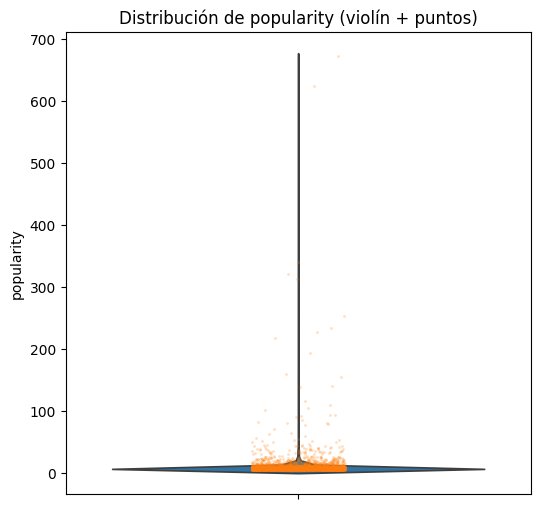

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.violinplot(y=df["popularity"], inner=None)
sns.stripplot(y=df["popularity"], size=2, alpha=0.25, jitter=True)
plt.title("Distribución de popularity (violín + puntos)")
plt.ylabel("popularity")
plt.xlabel("")
plt.show()

## B. Distribución de `vote_count`

> `vote_count` representa la cantidad de votos registrados para una película en TMDB; sirve como aproximación del nivel de interacción del público.



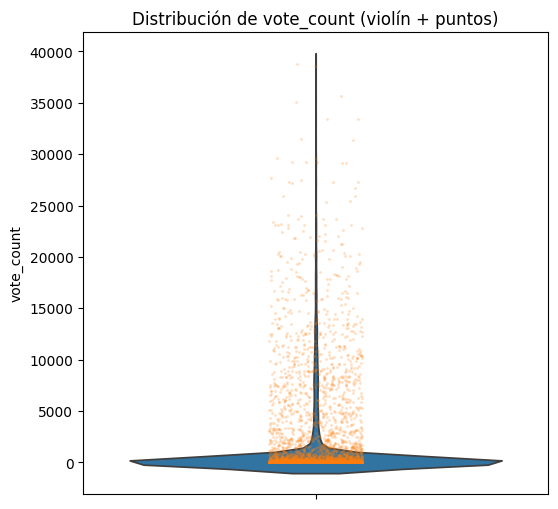

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.violinplot(y=df["vote_count"], inner=None)
sns.stripplot(y=df["vote_count"], size=2, alpha=0.25, jitter=True)
plt.title("Distribución de vote_count (violín + puntos)")
plt.ylabel("vote_count")
plt.xlabel("")
plt.show()

## C. Distribución de `vote_average`


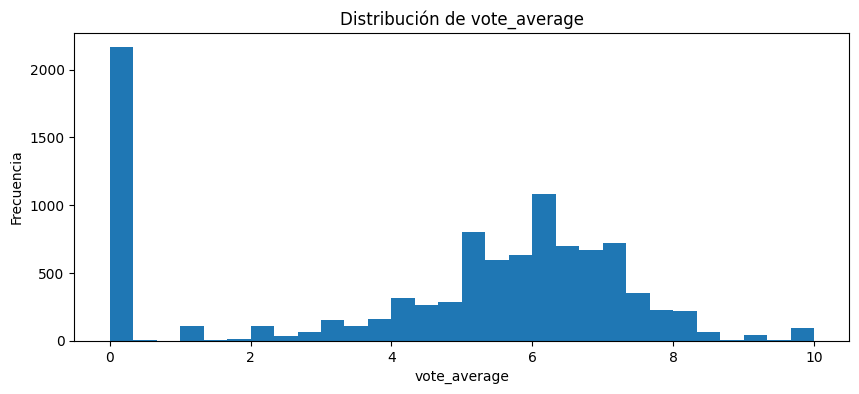

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(df["vote_average"].dropna(), bins=30)
plt.title("Distribución de vote_average")
plt.xlabel("vote_average"); plt.ylabel("Frecuencia")
plt.show()

## D. Relación entre `vote_count` y `popularity`


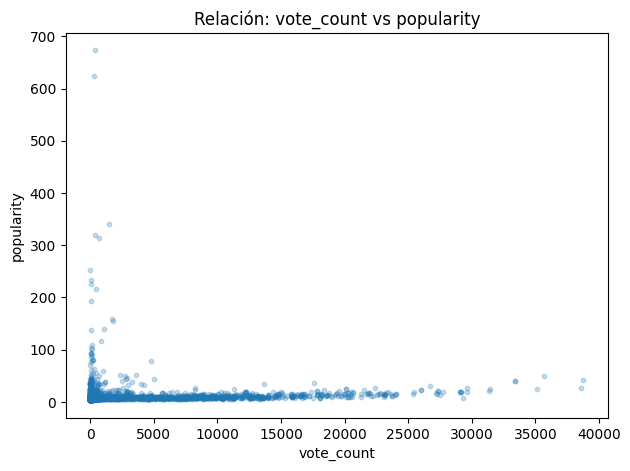

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["vote_count"], df["popularity"], alpha=0.25, s=10)
plt.title("Relación: vote_count vs popularity")
plt.xlabel("vote_count"); plt.ylabel("popularity")
plt.show()

## E. Relación entre `vote_average` y `vote_count`


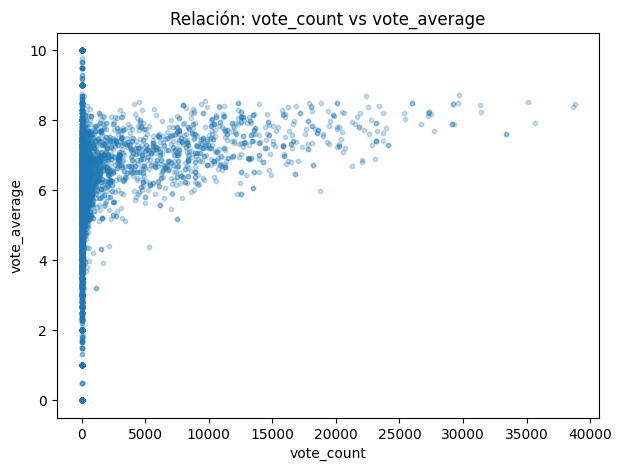

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(df["vote_count"], df["vote_average"], alpha=0.25, s=10)
plt.title("Relación: vote_count vs vote_average")
plt.xlabel("vote_count"); plt.ylabel("vote_average")
plt.show()

## F. Distribución de `original_language` (Top 10)


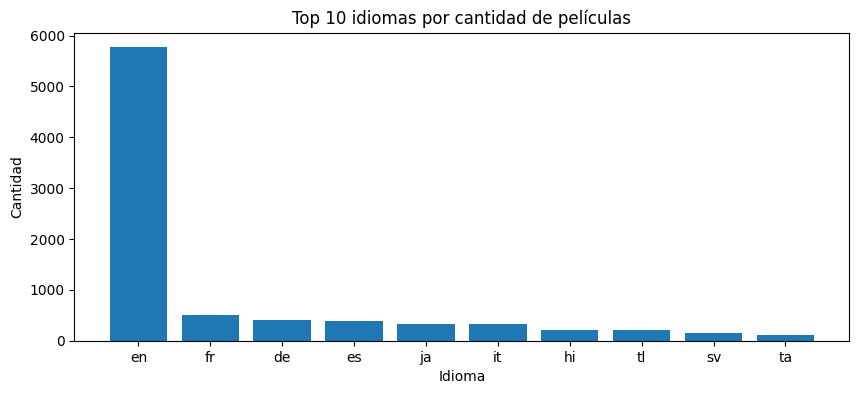

In [ ]:
top_lang = df["original_language"].value_counts().head(10)

plt.figure(figsize=(10,4))
plt.bar(top_lang.index, top_lang.values)
plt.title("Top 10 idiomas por cantidad de películas")
plt.xlabel("Idioma"); plt.ylabel("Cantidad")
plt.show()

## G. `popularity` promedio por idioma (Top 10 por cantidad)


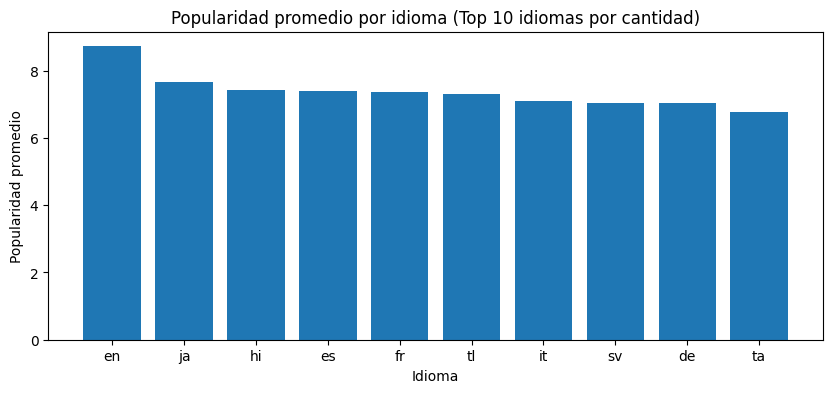

In [ ]:
lang_top = df["original_language"].value_counts().head(10).index
lang_mean = df[df["original_language"].isin(lang_top)].groupby("original_language")["popularity"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,4))
plt.bar(lang_mean.index, lang_mean.values)
plt.title("Popularidad promedio por idioma (Top 10 idiomas por cantidad)")
plt.xlabel("Idioma"); plt.ylabel("Popularidad promedio")
plt.show()

## I. `popularity` promedio por año (Top 15)


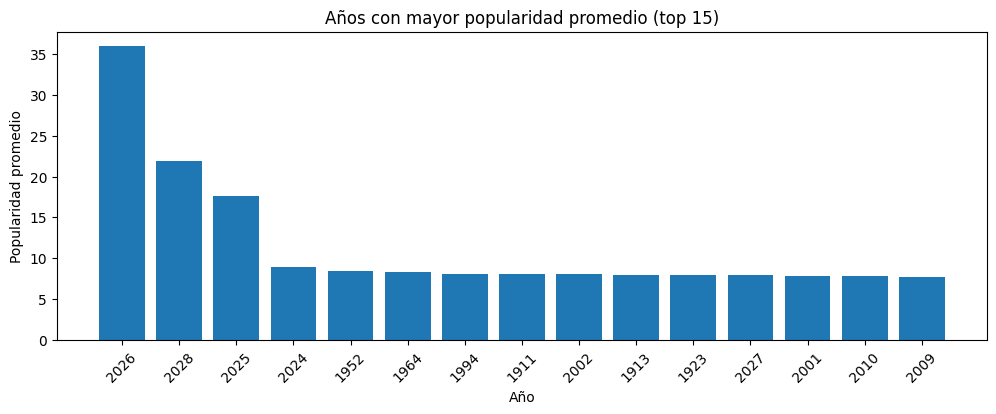

In [ ]:
tmp = df.copy()
tmp["year"] = tmp["release_date"].astype(str).str[:4]
tmp = tmp[tmp["year"].str.isdigit()]

year_pop = tmp.groupby("year")["popularity"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,4))
plt.bar(year_pop.index, year_pop.values)
plt.title("Años con mayor popularidad promedio (top 15)")
plt.xlabel("Año"); plt.ylabel("Popularidad promedio")
plt.xticks(rotation=45)
plt.show()

## H. Conteo de películas por año (según `release_date`)


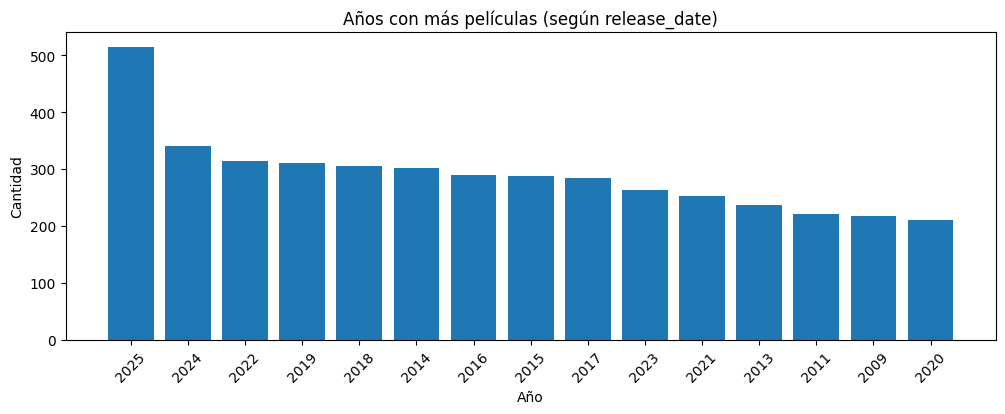

In [ ]:
years = df["release_date"].astype(str).str[:4]
year_counts = years.value_counts().head(15)

plt.figure(figsize=(12,4))
plt.bar(year_counts.index, year_counts.values)
plt.title("Años con más películas (según release_date)")
plt.xlabel("Año"); plt.ylabel("Cantidad")
plt.xticks(rotation=45)
plt.show()

## J. `vote_average` según rangos de `vote_count` (segmentación)


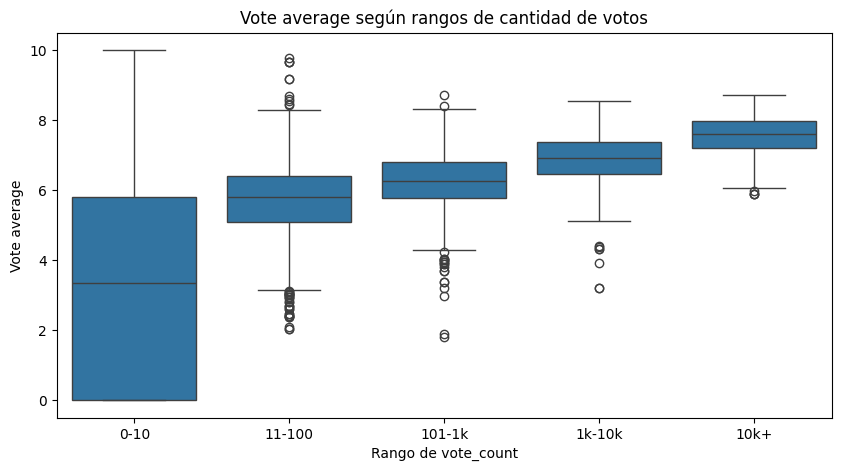

In [ ]:
tmp = df.copy()

# Creamos rangos para vote_count
tmp["votes_bin"] = pd.cut(
    tmp["vote_count"],
    bins=[-1, 10, 100, 1000, 10000, tmp["vote_count"].max()],
    labels=["0-10", "11-100", "101-1k", "1k-10k", "10k+"]
)

plt.figure(figsize=(10,5))
sns.boxplot(x="votes_bin", y="vote_average", data=tmp)
plt.title("Vote average según rangos de cantidad de votos")
plt.xlabel("Rango de vote_count"); plt.ylabel("Vote average")
plt.show()

# 5. Interpretaciones iniciales

## ¿Qué tendencias o patrones básicos se observan?

- **Distribución de popularidad:** La variable `popularity` presenta una distribución asimétrica hacia la derecha, donde la mayoría de películas se concentran en valores bajos y existe un grupo pequeño de títulos con valores muy altos (presencia de valores atípicos). Esto sugiere que una fracción muy pequeña de películas concentra niveles de exposición significativamente mayores que el resto.
- **Distribución de participación (votos):** `vote_count` también muestra una distribución altamente sesgada, con muchas películas que reciben pocos votos y unas pocas con una cantidad muy elevada. Esto indica que el nivel de interacción de los usuarios no está uniformemente distribuido en el dataset.
- **Distribución de calificaciones:** `vote_average` tiende a agruparse en un rango medio (dispersión considerable), lo que sugiere que muchas películas con pocos votos pueden presentar calificaciones extremas o inestables.
- **Relación entre `vote_count` y `popularity`:** Se observa ue no existe una relación lineal fuerte: Esto sugiere que la métrica de popularidad no depende directamente del volumen histórico de interacción.
- **Relación entre `vote_average` y `vote_count`:** Se observa una correlación positiva débil a moderada, lo que indica que las películas con mayor número de votos tienden a tener, en promedio, calificaciones ligeramente más altas, aunque la relación no es determinante.
- **Idiomas dominantes:** La mayor parte del dataset corresponde a películas en inglés (`original_language = en`),o que evidencia un sesgo significativo hacia este idioma, mientras que otros idiomas aparecen con menor representación. Y al analizar la popularidad promedio por idioma, existen diferencias, aunque estas podrían estar influenciadas por el tamaño de muestra de cada idioma.
- **Comportamiento temporal:** Se observan años recientes (2024–2026) con mayor número de películas y mayor popularidad promedio, lo que sugiere que la métrica de popularidad puede estar influenciada por recencia o actualización del dataset.
- **Segmentación por rangos de `vote_count`:** Al agrupar por rangos de votos, se observa un patrón claro: a mayor cantidad de votos, mayor es el promedio de `vote_average`.

## ¿Qué limitaciones tiene la base de datos?

- **No hay comportamiento real de usuarios:** El dataset no incluye eventos de usuarios (clics, reproducciones, tiempo de visualización). Por tanto, `popularity` y `vote_count` funcionan como *proxies* de elección, pero no prueban causalidad.
- **Sesgo hacia películas más visibles:** Variables como `vote_count` y `popularity` favorecen a películas con más exposición (marketing, distribución, tendencias), por lo que el análisis podría estar sesgado hacia títulos más conocidos.
- **Sesgo hacia películas en inglés:** Más de la mitad del catálogo está en inglés, lo que puede afectar la representatividad del análisis si se busca generalizar resultados globalmente.
- **Datos faltantes en variables de contenido:** Hay valores nulos en campos como `backdrop_path`, `poster_path`, `overview` y `release_date`, lo que limita el análisis completo de características de contenido.
- **Fechas como texto (en esta etapa):** `release_date` aparece como texto; para análisis temporales más precisos conviene estandarizarlo a formato fecha (esto se puede dejar como trabajo posterior de limpieza).
- **`genre_ids` requiere transformación:** Aunque es relevante para recomendaciones, `genre_ids` viene como una lista en texto, por lo que no se puede comparar directamente por género sin preprocesamiento.

## ¿Qué hipótesis iniciales podrían plantearse para análisis posteriores?

- **H1:** La popularidad (`popularity`) no depende directamente del volumen de votos (`vote_count`), lo que sugiere que puede estar influenciada por factores adicionales como recencia o tendencias.
- **H2:** El idioma original (`original_language`) podría influir en la popularidad promedio, aunque esta relación debe evaluarse controlando por tamaño de muestra.
- **H3:** La recencia (año de lanzamiento) influye en la popularidad promedio, especialmente si el dataset favorece títulos recientes o tendencias actuales.
- **H4:** Las películas con mayor (`vote_count`) presentan calificaciones promedio más altas y menor variabilidad, lo que indica mayor estabilidad estadística.
- **H5 (para recomendaciones):** Las películas con bajo `vote_count` presentan alta variabilidad en `vote_average`, por lo que podría ser necesario aplicar un sistema de ponderación (por ejemplo, estilo IMDb) que combine calificación promedio y número de votos para evitar sobrevalorar títulos con pocas interacciones.

# 6. Conclusiones

- Se observó que `popularity` y `vote_count` presentan distribuciones asimétricas, pues la mayoria de peliculas se encuentran valores muy bajos, son pocas las que estan en valores altos, generando una cola en el grafico de violin Esto sugiere que el interés de los usuarios tiende a concentrarse en un subconjunto pequeño del catálogo.

- Los graficos revelaron los siguientes patrones:
  - No existe una relación entre `vote_count` y `popularity`, la popularidad no se ve impulsada por el volumen de votos, ya que las mas populares no son las mas votadas
  - La variable `vote_average` se distribuye de forma más concentrada y no explica por sí sola la popularidad, lo que explica que la decisión de elegir una película depende de más factores que la calidad percibida, ademas hay muchos valores nulos que generan ruido
  - Se identificó una concentración del catálogo por idiomas (`original_language`) y diferencias en popularidad promedio entre los idiomas más frecuentes, lo que nos dice que el idioma puede ser útil para generar recomendaciones.
  
- Este entregable aporta una primera lectura del catálogo y ayuda a definir cuáles variables se consideran más útiles como señales iniciales para el sistema de recomendación (por ejemplo: `popularity`, `vote_count`, `vote_average`, idioma y año). También orienta los siguientes pasos del proyecto (preparación de datos)

# 7. Fuente de los datos

- **Dataset:** *Movies Dataset* (Kaggle) — https://www.kaggle.com/datasets/saketsingh9728/movies-dataset
- **Origen:** The Movie Database (TMDB) — https://www.themoviedb.org/
- **Descripción:** Dataset de 10.000 películas extraídas de TMDB.